## Do critics and moviegoers agree?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr

In [2]:
data = pyreadr.read_r('movies.Rdata')
movies = data['movies']

### Let's go to the movies!

Like many people, I love movies! Also like many people, I am not a movie critic. We often seek out critics' picks for movies to watch, and their words have taken up space on web pages and newspaper columns since the medium was invented over 100 years ago.

But are critics the best people to ask for a recommendation? Do they have their finger on the pulse of the viewers, or do they instead represent an untouchable cultural elite, disconnected from the commoners?

To see what I could find out, I used the following [data](http://www2.stat.duke.edu/~mc301/data/movies.html).

First of all, let's see how the critics broadly viewed this sample of 650 movies from Rotten Tomatoes:

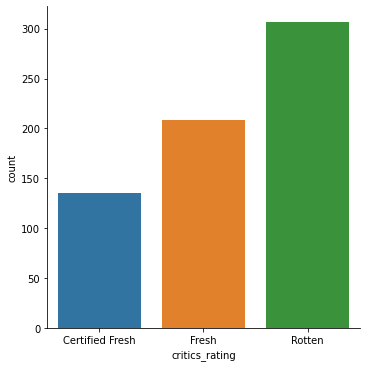

In [4]:
sns.catplot(kind='count', data=movies, x='critics_rating')
plt.show()

To start, looks like our critics are nearly 50/50 with an overall "Fresh" vs "Rotten" rating. On RT, a film is given "Fresh" appraisal if over 60% of reviews are positive (the only distinction for "Certified Fresh" is a higher number of Top Critics' reviews, plus a rating above 75%). 

This is nice to see, as it seems to go against the stereotype that critics are snobs with a high bar for a "good" film. For more detail, let's see the specific percentage breakdown for these categories:

This seems to be a good spread of ratings, but it looks like critics are overall very positive about this sample of films. There are fewer than 30 in the bottom 10%, but nearly 100 in the top 10%! 

To add a little context, let's fit these appraisals with box office performance. Unfortunately, this particular dataset does not provide financials beyond Top 200, so I will have to look into that relationship in a future project.

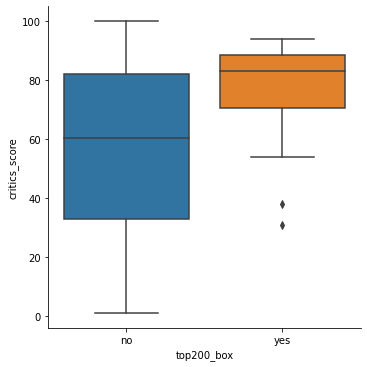

In [27]:
sns.catplot(kind='box', x=movies.top200_box, y=movies['critics_score'], data=movies)
plt.show()

While our critics are high on the big earners, the highest ratings seem to be reserved for lower-earning films. Perhaps these are the indie flicks and art-house movies that the typical moviegoer is unaware of? For a little more context, let's see if critics' ratings have changed over time:

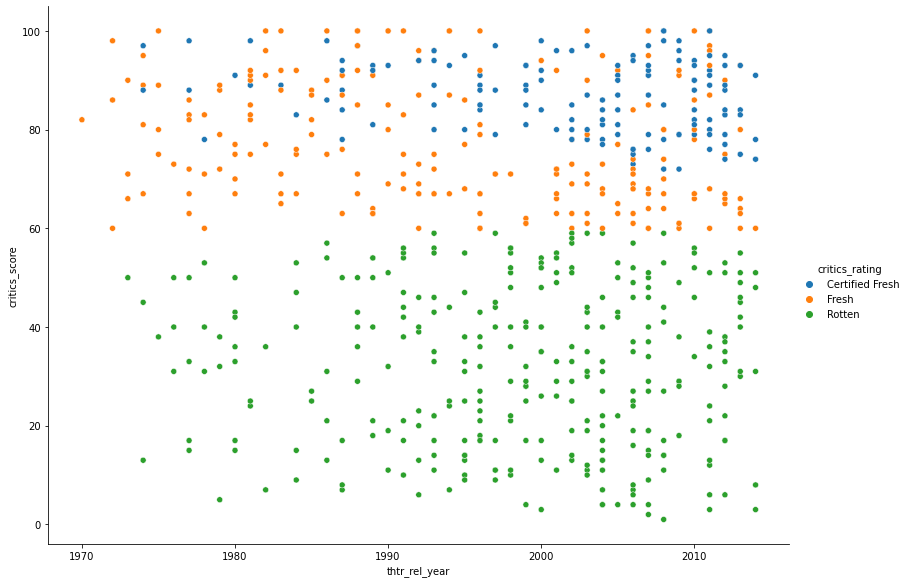

In [29]:
sns.relplot(kind='scatter', x=movies.thtr_rel_year, y=movies.critics_score, data=movies, height=8, aspect=11/8, hue=movies.critics_rating)
plt.show()

Funky! Doesn't look like there's a real trend over time with movies getting better or worse. Another stereotype, which I brought up earlier, was that critics may tend to favor indie or arthouse films. Let's see how snobby our critics tend to be:

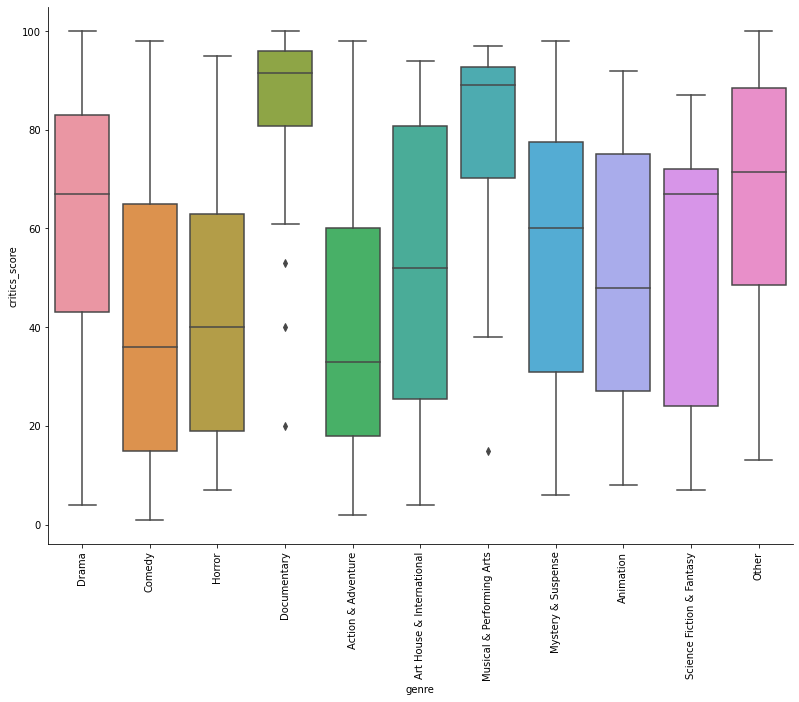

In [19]:
sns.catplot(kind='box', x=movies.genre, y=movies.critics_score, data=movies, height=8, aspect=11/8)
plt.xticks(rotation=90)
plt.show()

Critics are rarely known to favor Comedy, Horror, or Action movies, which is evident by the lack of awards these films tend to win at annual presentations. 

On the other hand, documentaries and musicals are highly rated, though I am curious about that lonely outlier underneath the Musicals' whiskers (I looked it up, even though it's the 1980 remake of <i>The Jazz Singer</i> I will not claim here that the critics prefer blackface). 

Now that we've thoroughly examined the critics, let's stack them up against the viewers motivated enough to rate movies on Rotten Tomatoes. 

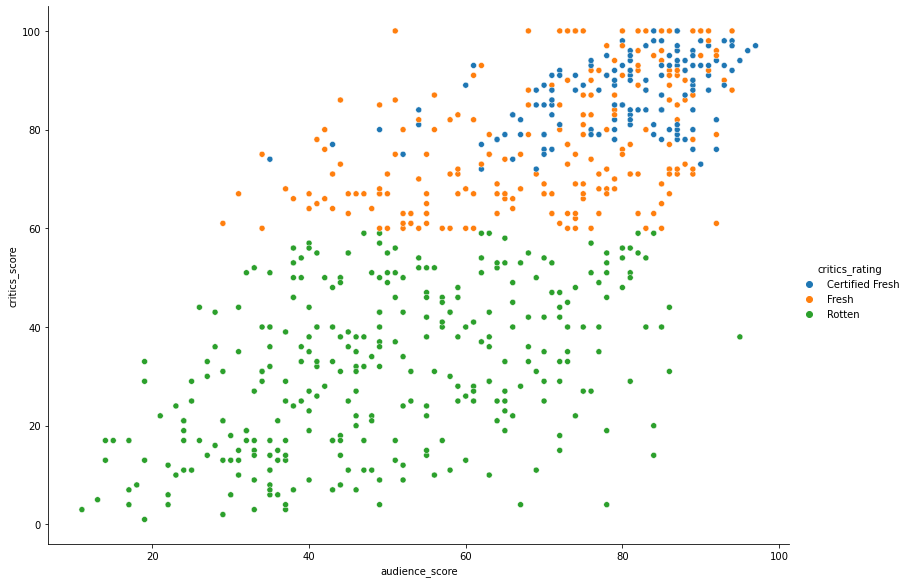

In [45]:
sns.relplot(kind='scatter', x=movies.audience_score, y=movies.critics_score, data=movies, height=8, aspect=11/8, hue=movies.critics_rating)
plt.show()

Looks like the audience scores are much more spread out. Though there is a general correlation between the two, there are a couple outliers where critics and audience seem to differ dramatically.

The biggest divide favored by the audience turns out to be 1991's <i>The Five Heartbeats</i>, ironically from the critically beloved Musical & Performing Arts genre. The movie gets a 95% from the audience, but only a 39% from the critics.

In the other corner is <i>Rambling Rose</i>, another 1991 drama. This film gets a rare 100% from critics, but only a 54% from audiences.

The largest gap for a Certified Fresh film is for 2011's <i>Rampart</i>, a Woody Harrelson drama. 

For consistency, I ran through the same few analyses for the audience scores:

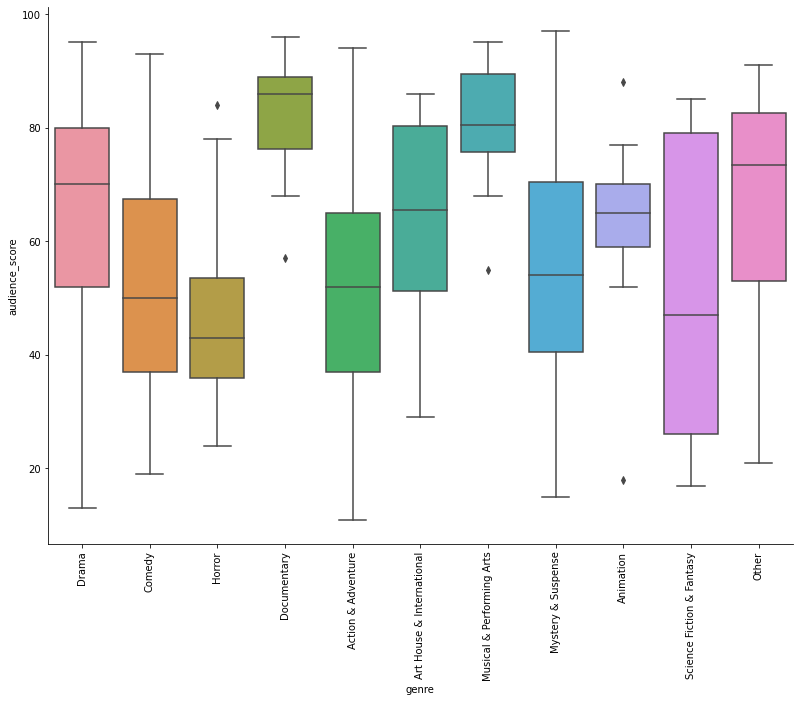

In [60]:
sns.catplot(kind='box', x=movies.genre, y=movies.audience_score, data=movies, height=8, aspect=11/8)
plt.xticks(rotation=90)
plt.show()

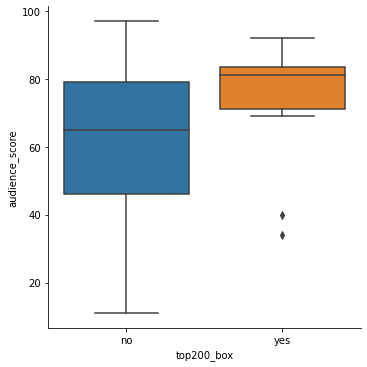

In [61]:
sns.catplot(kind='box', x=movies.top200_box, y=movies['audience_score'], data=movies)
plt.show()

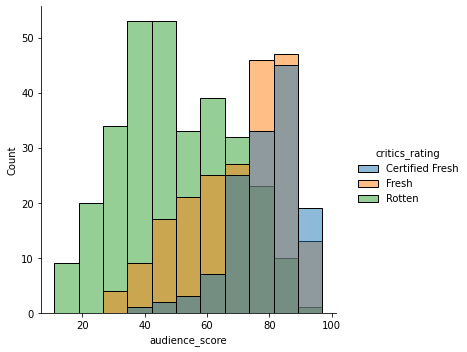

In [62]:
sns.displot(kind='hist', x=movies['audience_score'], hue=movies['critics_rating'])
plt.show()

On the genre front, audiences seemed to line up generally with the critics ratings. Comedies, Horror, and Action movies seemed to get lower general scores, with Documentaries and Musicals getting high marks. One wonders if this is the effect of critics elevating these movies, or an acutal consensus between the two groups of raters.

The same trend preserved itself for box office too. While the high earners where, on average, more highly rated, the highest rated films were not the highest financial draws. 

Finally, The juxtaposition of the audience and critics ratings reveals the same trend. In short, critics might not be the perfect source of truth for which movies are the best, but when you're looking to find the best way to spend your night at the theater you may as well trust what they have to say! 